#### 온라인리테일 사이트
- 2010/12 ~ 2011/12
- 50만건 데이터 셋
- 데이터 출처 : https://archive.ics.uci.edu/dataset/352/online+retail

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# warnings : 함수를 현재는 지원하나 나중에 삭제 시 경고 메세지가 발생

import warnings
warnings.simplefilter("ignore")

plt.style.use("seaborn-v0_8-whitegrid")
sns.set(rc={"figure.figsize":(10,5)})

plt.rcParams["font.family"] ="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

#### 1. 데이터 로드

In [3]:
retail_df = pd.read_csv("./data/OnlineRetail.csv")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


- InvoiceNo : 주문번호
- StockCode : 상품코드
- Description : 상품설명
- Quantity : 주문수량
- InvoiceDate : 주문날짜
- UnitPrice : 가격
- CustomerID : 고객아이디
- Country :고객 거주 국가

#### 2. 데이터 탐색

In [4]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### 3. 데이터 전처리

In [12]:
# null 이 아닌 데이터만 추출해서 df 저장

retail_df = retail_df[~retail_df["CustomerID"].isna()]
# retail_df = retail_df.query("CustomerID != 'null'")
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
retail_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
# Quantity, UnitPrice 가 0 보다 큰 데이터 추출

retail_df = retail_df[retail_df["Quantity"] > 0]

retail_df = retail_df[retail_df["UnitPrice"] > 0]

In [15]:
retail_df.shape

(397884, 8)

In [17]:
# customerID 데이터 타입 변경 float => int

retail_df["CustomerID"] = retail_df["CustomerID"].astype("int32")
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


In [18]:
# InvoiceDate datetime 타입 변환

retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])

In [19]:
# 총비용(CheckoutPrice) = 상품가격(UniPrice) * 수량(Quantitiy)

retail_df["CheckoutPrice"] = retail_df["UnitPrice"] * retail_df["Quantity"]

In [20]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [22]:
# 전처리 작업이 끝난 df => csv 저장(OnlineRetailClean.csv)

retail_df.to_csv("./data/OnlineRetailClean.csv",index=False)

#### 분석을 위한 정제된 데이터 로드

In [23]:
retail_df = pd.read_csv("./data/OnlineRetailClean.csv")

In [24]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [25]:
retail_df.dtypes

InvoiceNo          int64
StockCode         object
Description       object
Quantity           int64
InvoiceDate       object
UnitPrice        float64
CustomerID         int64
Country           object
CheckoutPrice    float64
dtype: object

In [26]:
# 날짜/시간 타입으로 변환

retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])

#### 매출 분석
- 전체 매출
- 국가별 매출
- 월별 매출
- 요일별 매출
- 시간별 매출

In [29]:
# 전체 매출

total_revenue = retail_df["CheckoutPrice"].sum()

print(retail_df["CheckoutPrice"].sum())

print(sum(retail_df["CheckoutPrice"]))

8911407.904
8911407.904003216


In [32]:
# 국가별 매출
# 국가명 그룹 설정, CheckoutPrice sum

rev_by_countries = retail_df.groupby("Country")["CheckoutPrice"].sum().sort_values(ascending=False)
rev_by_countries

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

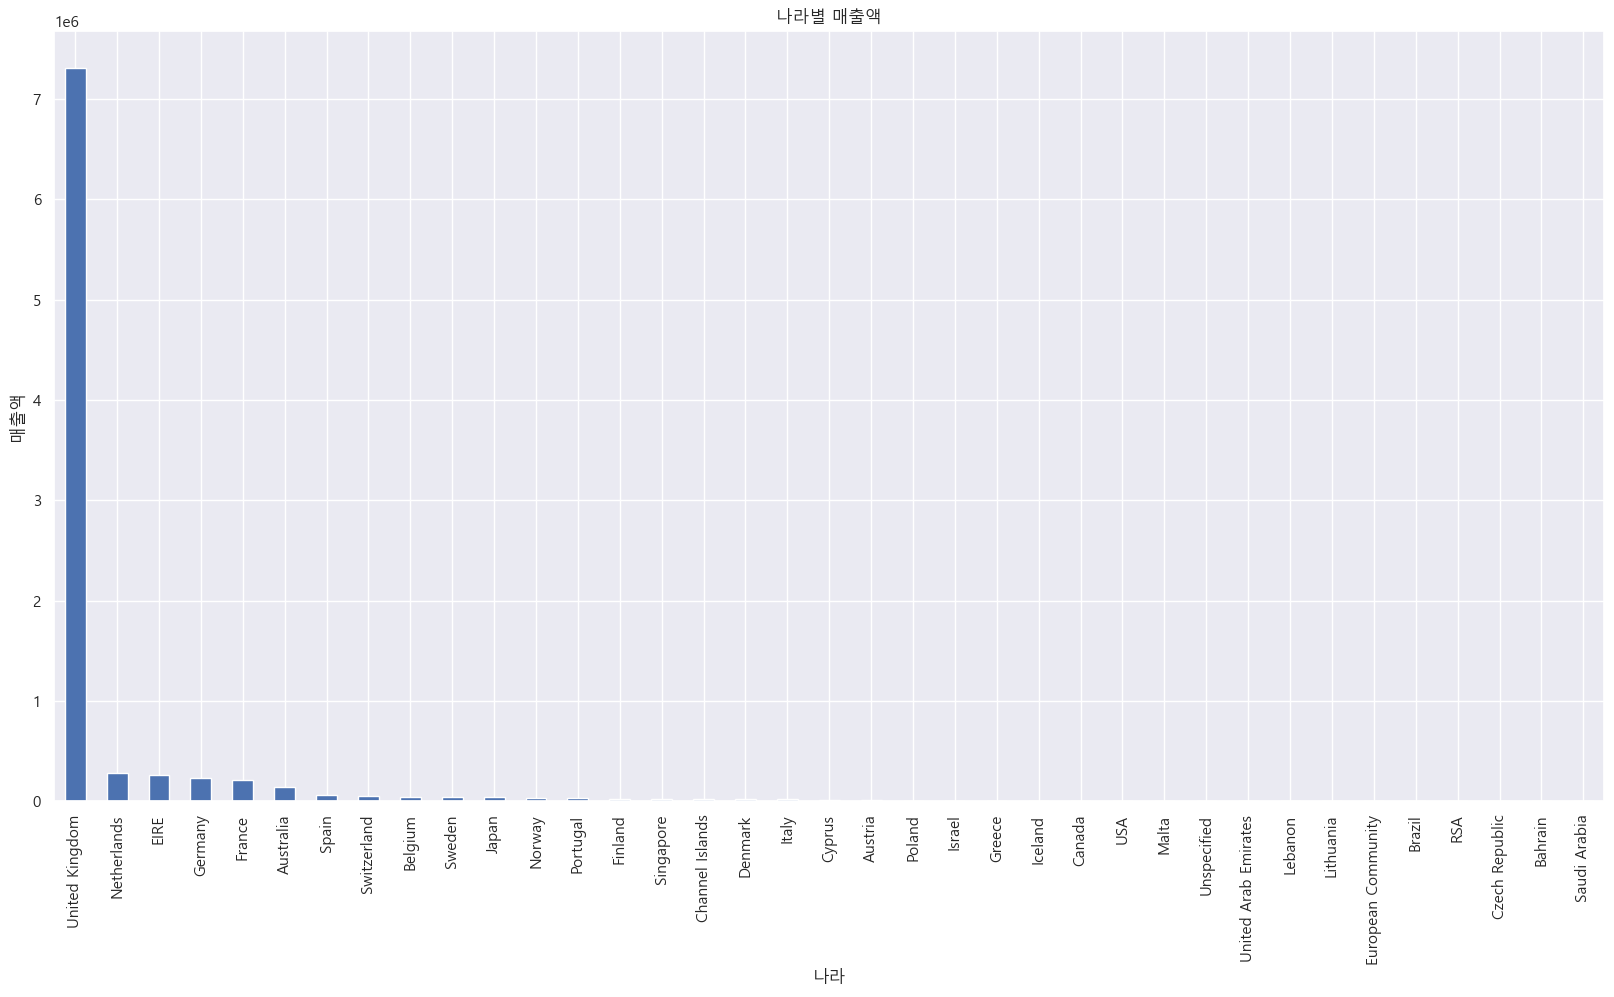

In [35]:
g = rev_by_countries.plot.bar(figsize=(20,10))
g.set_xlabel("나라")
g.set_ylabel("매출액")
g.set_title("나라별 매출액");

In [36]:
# 국가별 매출 점유율 확인

rev_by_countries / total_revenue

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

In [52]:
# 차트 그리기 함수화

def plot_bar(df, xlabel, ylabel,title, figsize=(20,10),rotation=45):
    g = df.plot.bar(figsize=figsize)
    g.set_xlabel(xlabel)
    g.set_ylabel(ylabel)
    g.set_title(title,fontsize=13)
    g.set_xticklabels(labels=df.index, rotation=rotation)

In [43]:
# 월별 매출

retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [47]:
def extract_month(date):
    # 월 가져오기
    month = str(date.month)
    if date.month < 10:
        month = "0"+month
    return str(date.year) + month

In [48]:
# 2010-12-01 08:26:00 ==> 201012 ==> 그룹화

extract_month(pd.to_datetime("2010-12-01 08:26:00"))

'201012'

In [51]:
rev_by_month = retail_df.set_index("InvoiceDate").groupby(extract_month)["CheckoutPrice"].sum()
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

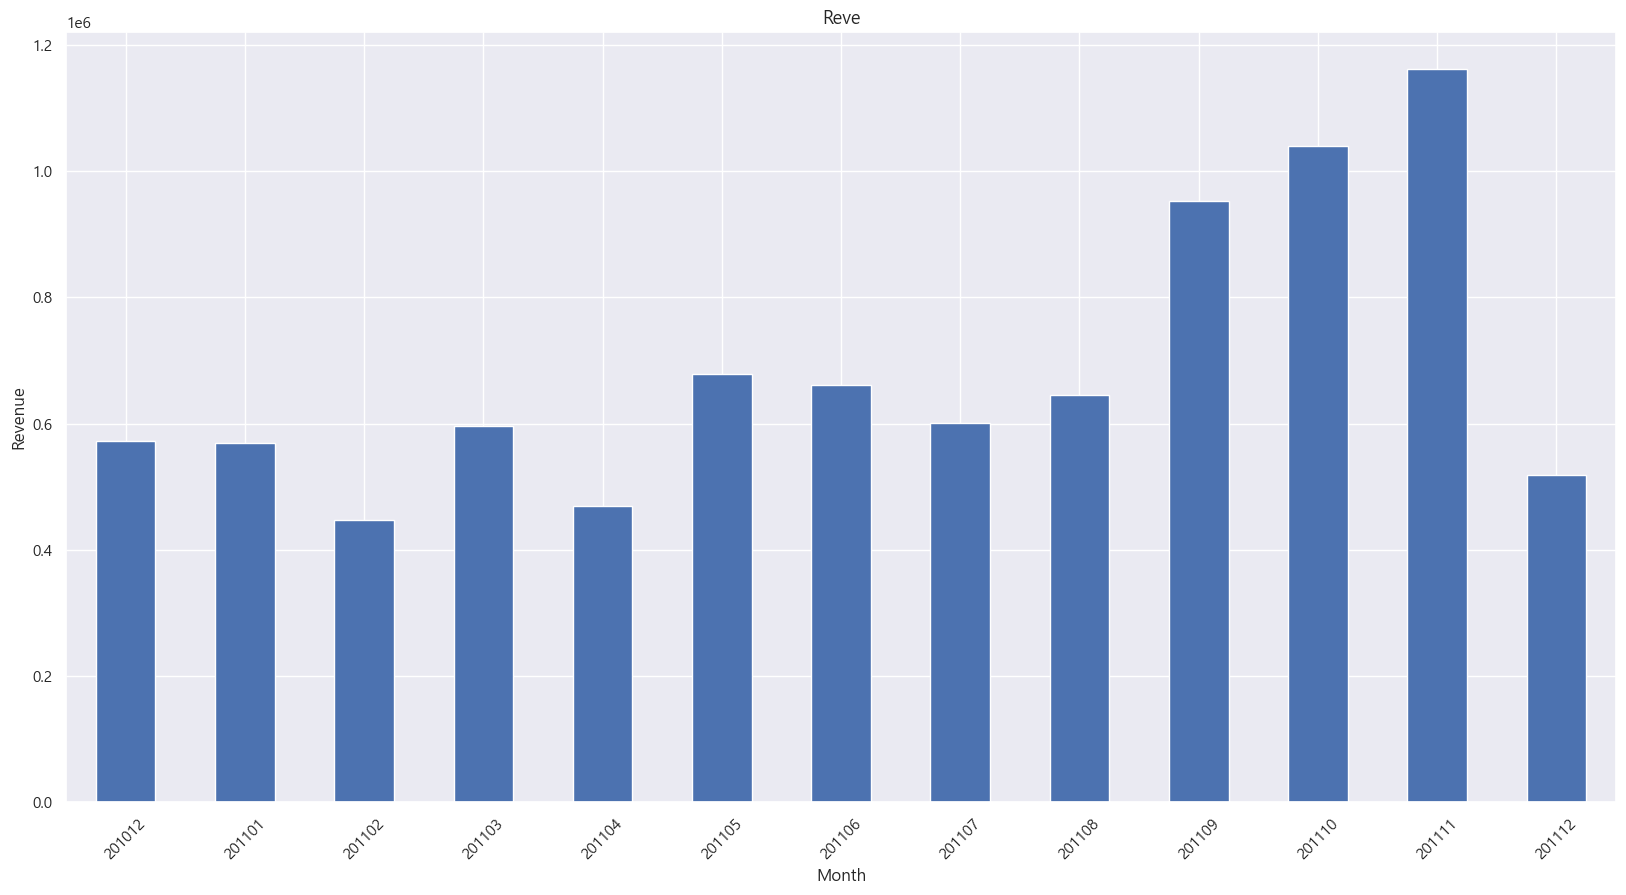

In [53]:
plot_bar(rev_by_month,"Month","Revenue","Revenues")

In [54]:
# 요일별 매출
# dayofweek : 요일을 숫자로 반환(0:월)

rev_by_dow = retail_df.set_index("InvoiceDate").groupby(lambda date:date.dayofweek)["CheckoutPrice"].sum()
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

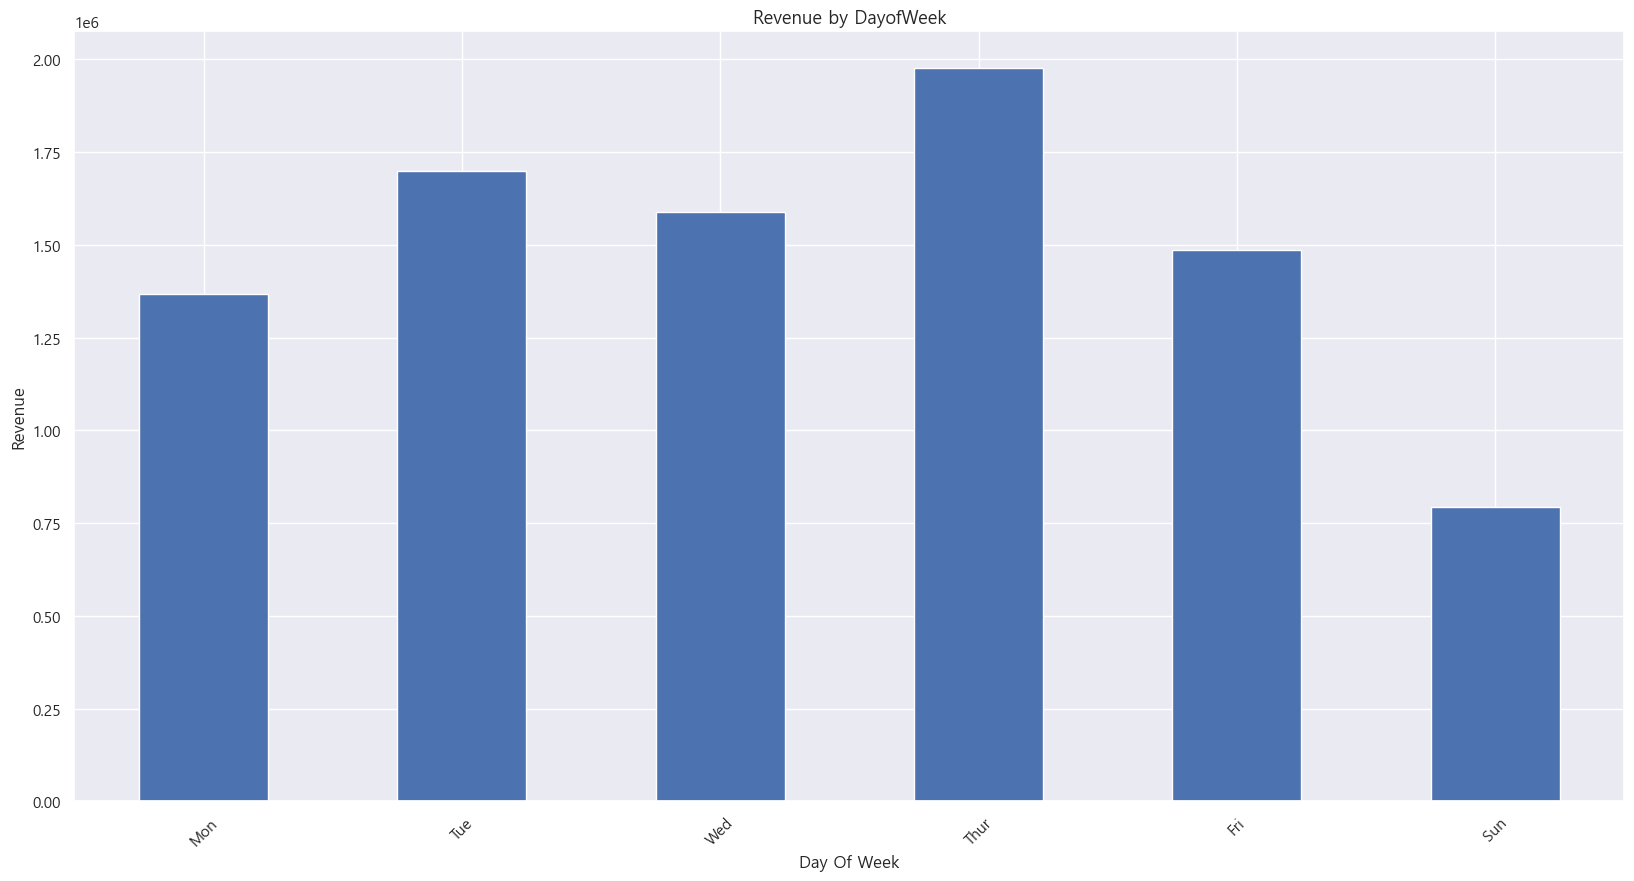

In [56]:
DAT_OF_WEEK = np.array(["Mon","Tue","Wed", "Thur", "Fri", "Sat", "Sun"])
rev_by_dow.index = DAT_OF_WEEK[rev_by_dow.index]

plot_bar(rev_by_dow, "Day Of Week", "Revenue", "Revenue by DayofWeek")

In [57]:
# 시간대별 매출

rev_by_hour = retail_df.set_index("InvoiceDate").groupby(lambda date:date.hour)["CheckoutPrice"].sum()
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

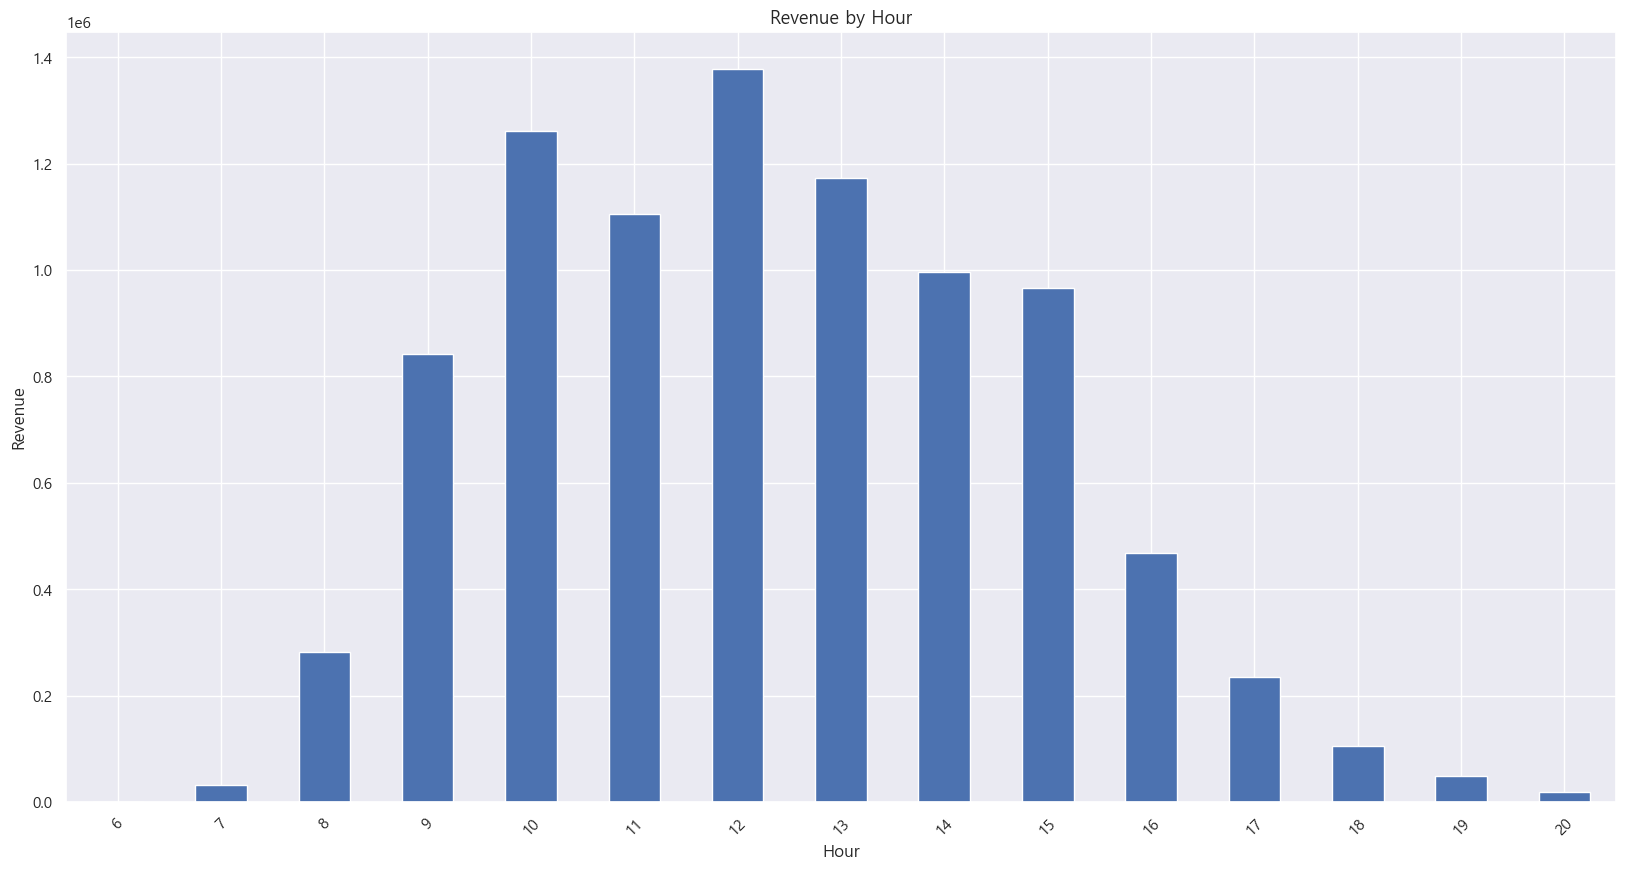

In [58]:
plot_bar(rev_by_hour, "Hour", "Revenue", "Revenue by Hour")

#### 제품
- Top10 판매 제품
- Top10 매출 제품

In [65]:
# 상품코드(StockCode) 그룹화,  수량(Quantity) 합계

top_selling = retail_df.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [67]:
# top10 매출액

top_revenue = retail_df.groupby("StockCode")["CheckoutPrice"].sum().sort_values(ascending=False).head(10)
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

In [70]:
# top3 제품의 월별 판매량 추이
top_selling3 = top_selling.head(3)

# 전체 제품 월별 판매량
# retail_df.set_index("InvoiceDate").groupby(["StockCode",extract_month])[["Quantity","CheckoutPrice"]].sum()

month_selling = retail_df.set_index("InvoiceDate").groupby(["StockCode",extract_month])[["Quantity","CheckoutPrice"]].sum()
top3 = month_selling.loc[top_selling3.index]
top3

Quantity  CheckoutPrice
StockCode InvoiceDate                         
23843     201112          80995      168469.60
23166     201101          74215       77183.60
          201105            792         869.04
          201106            391         458.51
          201107            718         826.94
          201108            405         486.09
          201109            342         397.26
          201110            235         283.67
          201111            631         708.11
          201112            187         203.51
84077     201012           5139        1150.47
          201101           1488         385.44
          201102           3457         795.17
          201103           3888         943.20
          201104          10224        2281.44
          201105           4944        1249.44
          201106           1920         533.76
          201107           3600         982.56
          201108           2256         654.24
          201109           3462         985.70
          201110           8174        1953.98
          201111           4500        1294.20
          201112           1363         376.65

#### 고객분석
- 우수고객 찾기

In [75]:
# 우수고객 - 구매횟수, 지불금액

retail_df.groupby("CustomerID")["Quantity"].count().sort_values(ascending=False).head(10)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
15311    2379
14646    2076
13089    1818
13263    1677
14298    1637
Name: Quantity, dtype: int64

In [74]:
retail_df.groupby("CustomerID")["CheckoutPrice"].sum().sort_values(ascending=False).head(10)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: CheckoutPrice, dtype: float64

In [76]:
# 시간대별 주문 건수

order_by_hour = retail_df.set_index("InvoiceDate").groupby(lambda date:date.hour)["CustomerID"].count()
order_by_hour

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

In [77]:
# 30 분 단위로 쪼개기

def half_an_hour(date):
    minute = ':00'
    if date.minute > 30:
        minute = ':30'
    hour = str(date.hour)

    if date.hour < 10:
        hour = "0"+hour
    return hour +minute

In [79]:
order_by_hour_half = retail_df.set_index("InvoiceDate").groupby(half_an_hour)["CustomerID"].count()
order_by_hour_half

InvoiceDate
06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

In [81]:
# 사용자별 주문량 시간대 확인

order_by_hour_count = retail_df.set_index("InvoiceDate").groupby(["CustomerID", lambda date:date.hour])["StockCode"].count()
order_by_hour_count

CustomerID  InvoiceDate
12346       10              1
12347       8              22
            10             24
            12             47
            13             18
                           ..
18283       15              1
            16             56
            19             87
18287       9               3
            10             67
Name: StockCode, Length: 11205, dtype: int64

In [82]:
# 사용자별 주문량이 가장 많은 시간대 추축
# idxmax() :index 최대값

idx = order_by_hour_count.groupby("CustomerID").idxmax()

result = order_by_hour_count.loc[idx]
result

CustomerID  InvoiceDate
12346       10               1
12347       14              60
12348       19              17
12349       9               73
12350       16              17
                          ... 
18280       9               10
18281       10               7
18282       13               7
18283       14             201
18287       10              67
Name: StockCode, Length: 4338, dtype: int64